Onderdeel van Poging 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

426.54028436018956


In [2]:
A = 2000 # m^2
Q = 150  # m^3/s
k0 = 0.48
labda = 84.4e-6 # m^-1
k = k0*Q/(labda*A)
h = 0.00000001*k       # From factor 0.00000001 reasonable result!

B = 3e3

D = (Q/A)**2-4*k*h
if  D < 0:
    print('Warning: D<0 -> oscillating solution!')
    r = np.sqrt(-D)/(2*k)
    print(r)
    M = np.array([[0,1,0],[np.exp(-Q/(2*k*A)*B)*np.sin(r*B), np.exp(-Q/(2*k*A)*B)*np.cos(r*B), -np.exp(-Q*B/(k*A))],[np.exp(-Q/(2*k*A)*B)*(r*np.cos(r*B) -Q/(2*k*A)*np.sin(r*B)), np.exp(-Q/(2*k*A)*B)*(-r*np.sin(r*B) -Q/(2*k*A)*np.cos(r*B)), Q/(k*A)*np.exp(-Q*B/(k*A))]])
    coeff = np.linalg.inv(M) @ np.array([2,1,0])
    
else:
    r1 = (-Q/A + np.sqrt((Q/A)**2-4*k*h))/(2*k)
    r2 = (-Q/A - np.sqrt((Q/A)**2-4*k*h))/(2*k)
    
    M = np.array([[1,1,0],[np.exp(r1*B), np.exp(r2*B), -np.exp(-Q*B/(k*A))],[r1*np.exp(r1*B), r2*np.exp(r2*B), Q/(k*A)*np.exp(-Q*B/(k*A))]])
    coeff = np.linalg.inv(M) @ np.array([2,1,0])

def f(x):
    if D<0:
        if x>B: return coeff[2]*np.exp(-Q/(k*A)*x)
        if x<=B: return np.exp(-Q/(2*k*A)*x)*(coeff[0]*np.sin(r*x)+coeff[1]*np.cos(r*x)) -1
    else:
        if x>B: return coeff[2]*np.exp(-Q/(k*A)*x)
        if x<=B: return coeff[0]*np.exp(r1*x) + coeff[1]*np.exp(r2*x) -1

4.7651439875645126e-05


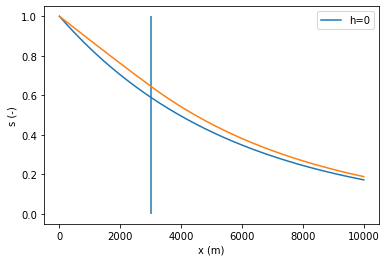

In [88]:
x = np.linspace(0,10e3,1000)
s = [f(x) for x in x]

plt.figure()
plt.plot(x,s0, label='h=0')
plt.plot(x,s)
plt.xlabel('x (m)')
plt.ylabel('s (-)')
plt.vlines(B,0,1)
plt.legend()
plt.show()